# Space Race Data Analysis

This dataset is taken from Kaggle. It contain information about all space missions from October 1957 to August 2020 across the globe. Here in this notebook, we are going to clean, analyze, visualize and explore this exciting dataset using python3.

Dataset URL: https://www.kaggle.com/agirlcoding/all-space-missions-from-1957

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [1]:
project_name = "space-race-analysis" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Creating a new project "tricksumo/space-race-analysis"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rishi/space-race-analysis-2682a


'https://jovian.ml/rishi/space-race-analysis-2682a'

## Data Preparation and Cleaning


**Step1: Downloading data** 

We can use urlretrieve() to download dataset.

In [5]:
from urllib.request import urlretrieve

urlretrieve("https://raw.githubusercontent.com/TrickSumo/space-race-analysis/master/Space_Corrected.csv","Space_Corrected.csv")


('Space_Corrected.csv', <http.client.HTTPMessage at 0x7f679c6cd820>)

**Step2: Import necessary libraries**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Step3:** Read data from .csv file and store it into pandas dataframe.

In [7]:
space_df_raw = pd.read_csv('Space_Corrected.csv')

space_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [8]:
space_df_raw.sample(5)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
3168,3168,3168,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sat Feb 03, 1973 05:48 UTC",Molniya-M /Block L | Molniya-1 n†­32,StatusRetired,NaN,Success
1474,1474,1474,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Wed Dec 06, 1995 23:23 UTC","Ariane 44L | Telecom 2C, Insat 2C",StatusRetired,NaN,Success
3755,3755,3755,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Tue Jul 04, 1967 05:59 UTC",Voskhod | Cosmos 168,StatusRetired,NaN,Success
1667,1667,1667,VKS RF,"Site 16/2, Plesetsk Cosmodrome, Russia","Sat Nov 21, 1992 10:21 UTC",Molniya-M /Block 2BL | Cosmos 2217,StatusRetired,NaN,Success
2699,2699,2699,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Jun 22, 1977 08:00 UTC",Soyuz U | Cosmos 920,StatusRetired,NaN,Success


Dataframe have 4324 columns and 9 rows. Now we have to clean and extract necessary columns.

In [9]:
space_df = space_df_raw[['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket', ' Rocket', 'Status Mission']]

Now its time to rename columns to make analysis more convenient.

In [10]:
space_df = space_df.rename(str.strip, axis='columns')
space_df = space_df.rename({'Company Name':'company', 'Location':'location', 'Datum':'datum', 'Detail':'detail', 'Status Rocket':'rocket_status', 'Rocket':'cost_in_million', 'Status Mission':'mission_status'}, axis='columns')

space_df.head(5)

,company,location,datum,detail,rocket_status,cost_in_million,mission_status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Location column contain location of spaceport. It can be used to extract coutry name.

In [11]:
def extract_country_name(location):
    country = location.split(',')[-1]
    country = country.strip()
    return country


space_df['country'] = space_df['location'].apply(lambda x: extract_country_name(x))


# Changing name of countries as per present world map.

countries_dict = {
    'Russia' : 'Russia',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russia',
    "Gran Canaria": 'USA'
}

space_df['country'] = space_df['country'].replace(countries_dict)

space_df.head(5)

,company,location,datum,detail,rocket_status,cost_in_million,mission_status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


Now datum column can be used to extract year of launch. We can use pd.to_datetime() to convert whole column to date time format.

In [12]:
space_df.datum = pd.to_datetime(space_df.datum)
space_df.datum

0       2020-08-07 05:12:00+00:00
1       2020-08-06 04:01:00+00:00
2       2020-08-04 23:57:00+00:00
3       2020-07-30 21:25:00+00:00
4       2020-07-30 11:50:00+00:00
                  ...            
4319    1958-02-05 07:33:00+00:00
4320    1958-02-01 03:48:00+00:00
4321    1957-12-06 16:44:00+00:00
4322    1957-11-03 02:30:00+00:00
4323    1957-10-04 19:28:00+00:00
Name: datum, Length: 4324, dtype: object

In [13]:
space_df['year'] = space_df['datum'].apply(lambda datetime: datetime.year)
space_df.sample(5)

,company,location,datum,detail,rocket_status,cost_in_million,mission_status,country,year
2541,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1978-12-20 20:43:00+00:00,Cosmos-3M (11K65M) | Cosmos 1064,StatusRetired,NaN,Partial Failure,Russia,1978
1204,VKS RF,"Site 45/1, Baikonur Cosmodrome, Kazakhstan",2000-03-02 09:26:00+00:00,Zenit-2 | Cosmos 2369,StatusRetired,NaN,Success,Kazakhstan,2000
3994,RVSN USSR,"Site 86/1, Kapustin Yar, Russia",1965-01-30 09:36:00+00:00,Cosmos-2I (63S1) | Cosmos 53,StatusRetired,NaN,Success,Russia,1965
2989,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia",1974-11-01 14:20:00+00:00,Voskhod | Cosmos 692,StatusRetired,NaN,Success,Russia,1974
2527,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1979-02-27 00:00:00,Cosmos-3M (11K65M) | Intercosmos-19,StatusRetired,NaN,Success,Russia,1979


Now we can drop some columns and reindex them.

In [14]:
space_df.drop(columns=['location','datum','detail'], inplace=True)

space_df = space_df.reindex(columns=['company','country','year','mission_status','rocket_status','cost_in_million'])

space_df.sample(5)

,company,country,year,mission_status,rocket_status,cost_in_million
3665,RVSN USSR,Russia,1968,Success,StatusRetired,NaN
3396,RVSN USSR,Russia,1970,Success,StatusRetired,NaN
2930,RVSN USSR,Russia,1975,Success,StatusRetired,NaN
1860,RVSN USSR,Russia,1989,Success,StatusRetired,NaN
3814,RVSN USSR,Russia,1966,Success,StatusRetired,NaN


cost_in_million data contain many NaN vaules because cost of that mission was not made public. We can replace NaN values by 0.

In [15]:
space_df.cost_in_million = pd.to_numeric(space_df.cost_in_million, errors = 'coerce')
space_df.cost_in_million = space_df.cost_in_million.fillna(0)
space_df.sample(5)

,company,country,year,mission_status,rocket_status,cost_in_million
2593,RVSN USSR,Russia,1978,Success,StatusRetired,0.0
771,NASA,USA,2009,Success,StatusRetired,450.0
1892,RVSN USSR,Russia,1989,Success,StatusRetired,0.0
3934,RVSN USSR,Kazakhstan,1965,Success,StatusRetired,0.0
4106,US Air Force,USA,1962,Success,StatusRetired,0.0


In [ ]:
import jovian

In [ ]:
jovian.commit()

## Exploratory Analysis and Visualization

**1. Year-wise Trend-** Space race started back in 1957 and continues till date. Missions per year across globe can be viewed as:

In [16]:
mission_distribution_over_years = space_df.groupby(['year']).company.count()
mission_distribution_over_years

year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: company, Length: 64, dtype: int64

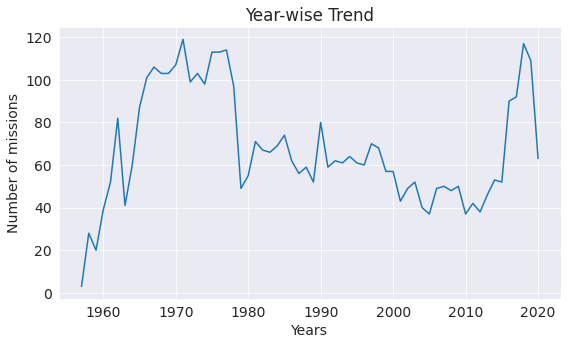

In [17]:
plt.plot(mission_distribution_over_years);
plt.xlabel("Years"); plt.ylabel("Number of missions"); plt.title("Year-wise Trend");

**2. Year-wise Trend in India**

In [18]:
space_india_df = space_df[space_df.country == 'India']

mission_distribution_over_years_india = space_india_df.groupby(['year']).company.count()

print("Total missions by ISRO India are: ", mission_distribution_over_years_india.sum(),"\n")
print(mission_distribution_over_years_india)


Total missions by ISRO India are:  76 

year
1979    1
1980    1
1981    1
1983    1
1987    1
1988    1
1989    1
1993    1
1994    2
1996    1
1997    1
1999    1
2001    2
2002    1
2003    2
2004    1
2005    1
2006    1
2007    3
2008    3
2009    2
2010    3
2011    3
2012    3
2013    3
2014    5
2015    5
2016    7
2017    5
2018    7
2019    6
Name: company, dtype: int64


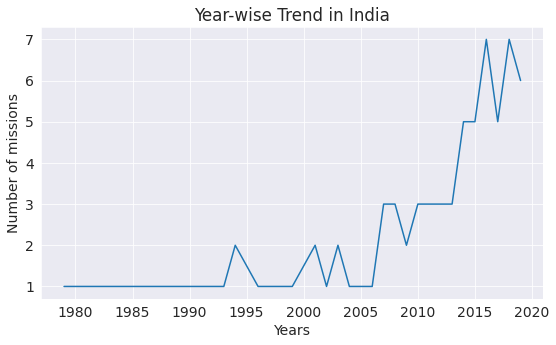

In [19]:
plt.plot(mission_distribution_over_years_india);
plt.plot
plt.xlabel("Years"); plt.ylabel("Number of missions"); plt.title("Year-wise Trend in India");

**3. Mission Status Analysis**

In [20]:
def percentage(num):
    return (num*100)/4324 

mission_status_data = space_df.groupby(['mission_status']).mission_status.count()

print(" Total Missions = {}. \n Success = {}, Failure = {}, Partial-Failure = {}, Prelaunch-Failure = {}. \n".format(mission_status_data.sum(), mission_status_data[3], mission_status_data[0], mission_status_data[1], mission_status_data[2]))

print(" Success = {} %,  Failure = {} %, \n Partial-Failure = {} %,  Prelaunch-Failure = {} %.".format( percentage(mission_status_data[3]), percentage(mission_status_data[0]), percentage(mission_status_data[1]), percentage(mission_status_data[2]) ))


 Total Missions = 4324. 
 Success = 3879, Failure = 339, Partial-Failure = 102, Prelaunch-Failure = 4. 

 Success = 89.7086031452359 %,  Failure = 7.8399629972247915 %, 
 Partial-Failure = 2.358926919518964 %,  Prelaunch-Failure = 0.09250693802035152 %.


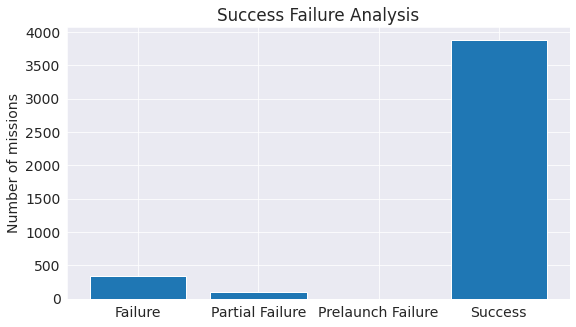

In [21]:
success_failure_dict = dict(space_df.groupby(['mission_status']).year.count())
plt.bar(*zip(*success_failure_dict.items()));
plt.ylabel("Number of missions"); plt.title("Success Failure Analysis");

Majority of missions (89.7%) got success throughout space journey. But even that small fraction of failure cost huge financial loss.

In [22]:
def remove_zeros(loss_per_year):
    tmp_list = []
    for i in loss_per_year:
        if loss_per_year[i] < 1: tmp_list.append(i)
    for j in tmp_list:
        loss_per_year.pop(j)
    return loss_per_year
        

loss_per_year = dict(space_df[space_df.mission_status != 'Success'].groupby(['year']).cost_in_million.sum())
loss_per_year = remove_zeros(loss_per_year)
loss_per_year


{1964: 63.23,
 1967: 118.0,
 1986: 450.0,
 1990: 136.6,
 1991: 40.0,
 1993: 60.0,
 1994: 149.7,
 1995: 60.0,
 1996: 40.0,
 1997: 25.0,
 2001: 92.0,
 2002: 200.0,
 2003: 450.0,
 2004: 350.0,
 2005: 41.8,
 2006: 83.0,
 2007: 163.0,
 2008: 7.0,
 2009: 45.0,
 2010: 94.0,
 2011: 86.8,
 2012: 59.5,
 2013: 106.8,
 2014: 80.0,
 2015: 71.5,
 2016: 156.43,
 2017: 116.15,
 2018: 200.0,
 2019: 101.68,
 2020: 76.94999999999999}

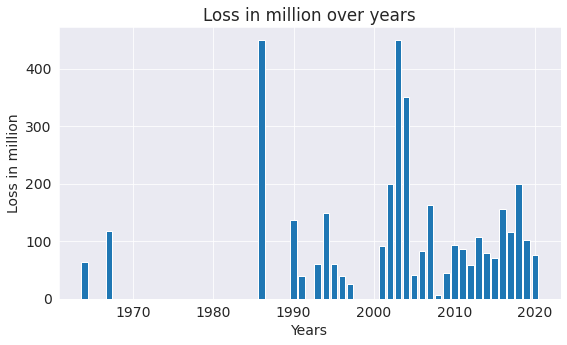

In [23]:
plt.bar(*zip(*loss_per_year.items()))
plt.xlabel("Years");plt.ylabel("Loss in million"); plt.title("Loss in million over years");

**4. Rocket Status Analysis**

In [24]:
status = space_df.groupby(['rocket_status']).company.count()
print(status)

print("\n Active rockets are {} % and Retired rockets are {} % since beginning of space race.".format(percentage(status[0]),percentage(status[1])))

rocket_status
StatusActive      790
StatusRetired    3534
Name: company, dtype: int64

 Active rockets are 18.270120259019425 % and Retired rockets are 81.72987974098058 % since beginning of space race.


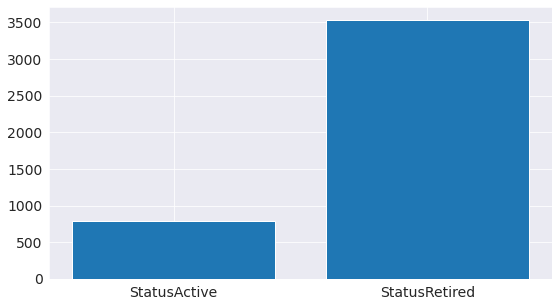

In [25]:
status = dict(status)
plt.bar(*zip(*status.items()));

**5. Missions Launched Country-wise Since 1957**

In [29]:
countrywise_launch = space_df.groupby(['country']).country.count()
countrywise_launch.sort_values(axis=0,ascending=False)

country
Russia           1398
USA              1351
Kazakhstan        701
France            303
China             269
Japan             126
India              76
Pacific Ocean      36
Iran               14
New Zealand        13
Israel             11
Kenya               9
Australia           6
North Korea         5
South Korea         3
Brazil              3
Name: country, dtype: int64

It is important to note that Kazakhstan had leased Russia **Baikonur Cosmodrome spaceport** until 2050.

So all launch from Kazakhstan are by Russia actually. Hence we can add launches of Russia and Kazakhstan. And Kazakhstan  completely.

In [30]:
countrywise_launch['Russia'] = countrywise_launch['Russia'] + countrywise_launch['Kazakhstan']
countrywise_launch = countrywise_launch.drop(labels='Kazakhstan')

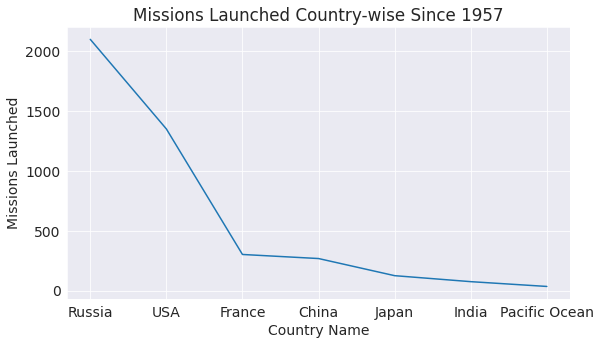

In [31]:
plt.plot(countrywise_launch.sort_values(axis=0,ascending=False).head(7));
plt.xlabel("Country Name");plt.ylabel("Missions Launched"); plt.title("Missions Launched Country-wise Since 1957");

Clearly, Russia is top country in number of launnches followed by USA, France, China, Japan and India.

**6. Missions Launched Company-wise Since 1957**

In [32]:
space_df.groupby(['company']).company.count().sort_values(axis=0, ascending = False)

company
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Eurockot              13
ESA                   13
ISA                   13
Rocket Lab            13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
KCST                   5
UT                     5
CASIC                  5
CECLES                 4
Arm??e de l'Air        4
Exos             

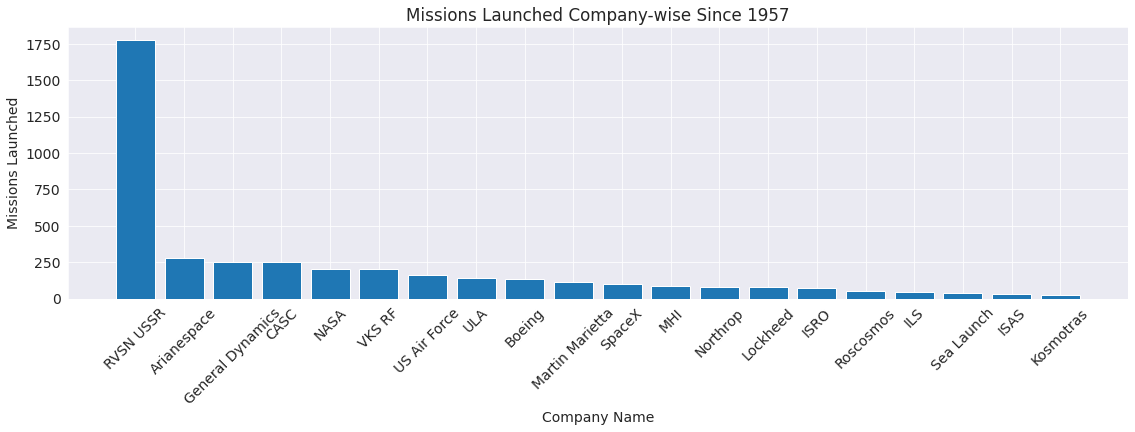

In [33]:
matplotlib.rcParams['figure.figsize'] = (19, 5)
plt.xticks(rotation=45);
dict_to_plot = dict(space_df.groupby(['company']).company.count().sort_values(axis=0, ascending = False).head(20));
plt.bar(*zip(*dict_to_plot.items()));
plt.xlabel("Company Name");plt.ylabel("Missions Launched"); plt.title("Missions Launched Company-wise Since 1957");

**7. Country-wise Success Distribution Over Years**

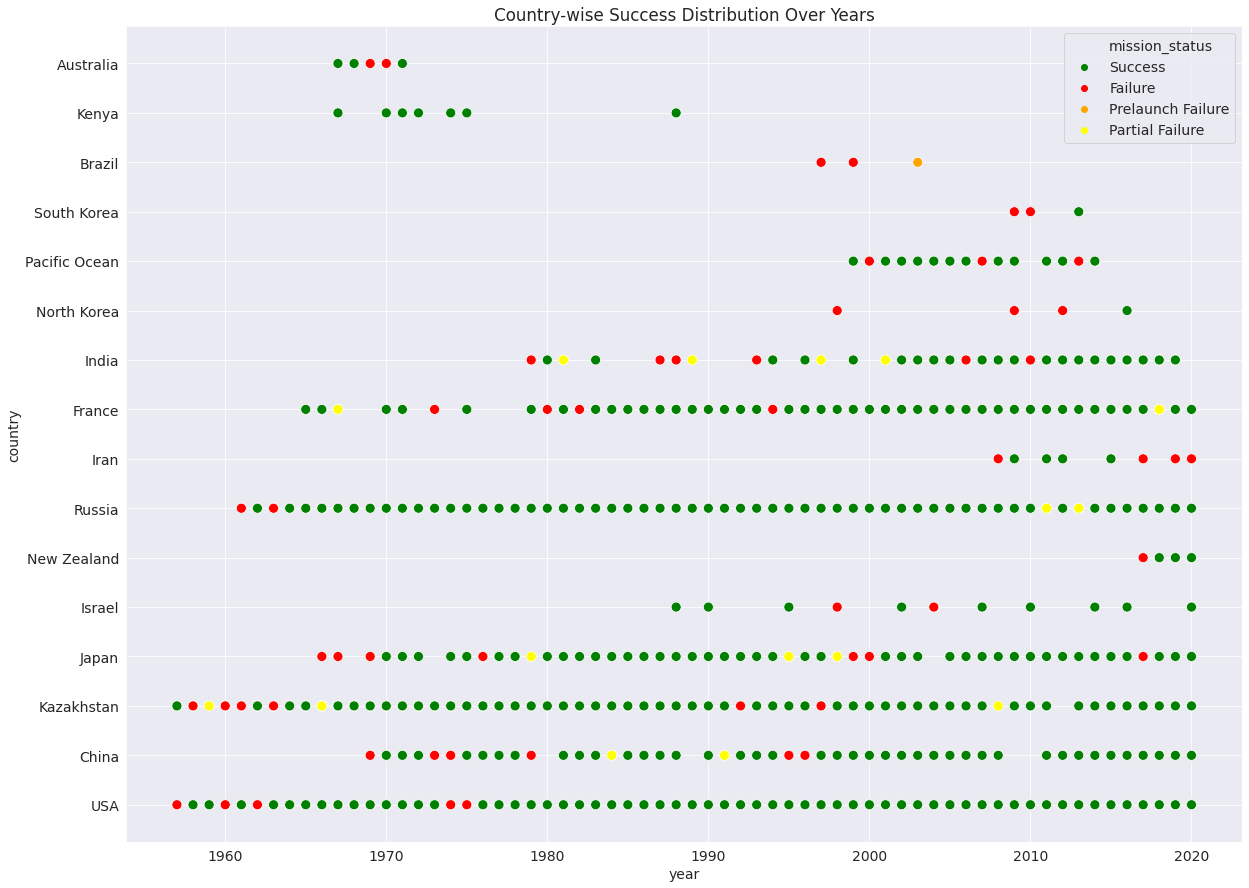

In [34]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
sns.scatterplot(space_df.year,space_df.country, hue=space_df.mission_status,s=100,palette=['green','red','orange','yellow',]);
plt.title("Country-wise Success Distribution Over Years");

Clearly, initial missions of new comer countires generally tend to fail (however not necessary). 
With advance in technology and experince, sucess rate seems to be increased in last decade (especiallly for USA, India, Russia, China and France). 
But there is always risk of failure.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Asking and Answering Questions

**1. Which is the most successful launch Location?**

In [35]:
df = space_df.copy()
performance_list = []

for country in df['country'].unique():
    
    df1 = df[df.country == country]
    df2 = df1[df1.mission_status == "Success"]


    try:
        
        

        success_percentage = (   df2.groupby('mission_status').mission_status.count()[0]   /   df1.groupby('country').country.count()[0]   ) * 100
        print("{} = {} % Success rate out of {} missions".format(country,success_percentage,df1.groupby('country').country.count()[0]))
        
        performance_list.append(success_percentage)
         
    except IndexError:
        print(country, "=  0 % Success Rate out of {} missions".format(df1.groupby('country').country.count()[0]))
        performance_list.append(0)

USA = 87.93486306439674 % Success rate out of 1351 missions
China = 90.70631970260223 % Success rate out of 269 missions
Kazakhstan = 86.73323823109843 % Success rate out of 701 missions
Japan = 89.68253968253968 % Success rate out of 126 missions
Israel = 81.81818181818183 % Success rate out of 11 missions
New Zealand = 84.61538461538461 % Success rate out of 13 missions
Russia = 93.34763948497854 % Success rate out of 1398 missions
Iran = 35.714285714285715 % Success rate out of 14 missions
France = 94.05940594059405 % Success rate out of 303 missions
India = 82.89473684210526 % Success rate out of 76 missions
North Korea = 40.0 % Success rate out of 5 missions
Pacific Ocean = 91.66666666666666 % Success rate out of 36 missions
South Korea = 33.33333333333333 % Success rate out of 3 missions
Brazil =  0 % Success Rate out of 3 missions
Kenya = 100.0 % Success rate out of 9 missions
Australia = 50.0 % Success rate out of 6 missions


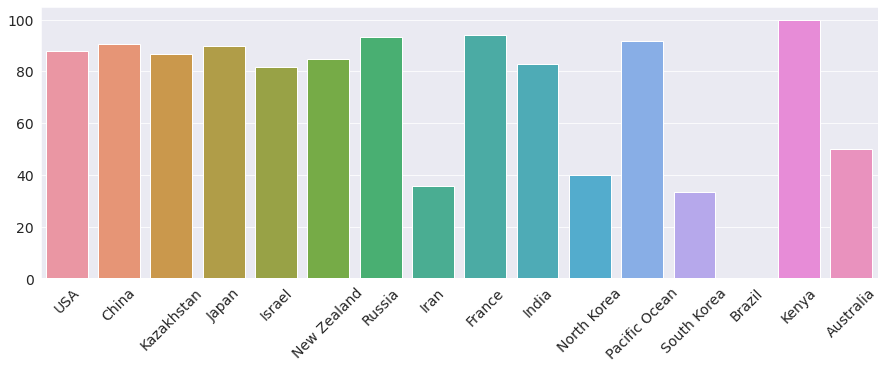

In [36]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
plt.xticks(rotation=45);
sns.barplot( df['country'].unique(), performance_list);

Clrealy, Kenya have best success (100%) but they have only 9 missions.
Brazil has wrost performance (0%) with 3 missions)

**2. Most Successful comapny?**

In [37]:
performance_list = []

for company in df['company'].unique():
    
    df1 = df[df.company == company]
    df2 = df1[df1.mission_status == "Success"]


    try:       

        success_percentage = (   df2.groupby('mission_status').mission_status.count()[0]   /   df1.groupby('company').company.count()[0]   ) * 100
        print("{} = {} % Success rate out of {} missions".format(company,success_percentage,df1.groupby('company').company.count()[0]))
        
        performance_list.append(success_percentage)
         
    except IndexError:
        print(company, "=  0 % Success Rate out of {} missions".format(df1.groupby('country').company.count()[0]))
        performance_list.append(0)

SpaceX = 94.0 % Success rate out of 100 missions
CASC = 92.03187250996015 % Success rate out of 251 missions
Roscosmos = 92.72727272727272 % Success rate out of 55 missions
ULA = 99.28571428571429 % Success rate out of 140 missions
JAXA = 85.71428571428571 % Success rate out of 7 missions
Northrop = 89.1566265060241 % Success rate out of 83 missions
ExPace = 90.0 % Success rate out of 10 missions
IAI = 81.81818181818183 % Success rate out of 11 missions
Rocket Lab = 84.61538461538461 % Success rate out of 13 missions
Virgin Orbit =  0 % Success Rate out of 1 missions
VKS RF = 93.53233830845771 % Success rate out of 201 missions
MHI = 95.23809523809523 % Success rate out of 84 missions
IRGC = 100.0 % Success rate out of 1 missions
Arianespace = 96.415770609319 % Success rate out of 279 missions
ISA = 30.76923076923077 % Success rate out of 13 missions
Blue Origin = 100.0 % Success rate out of 12 missions
ISRO = 82.89473684210526 % Success rate out of 76 missions
Exos =  0 % Success Rate

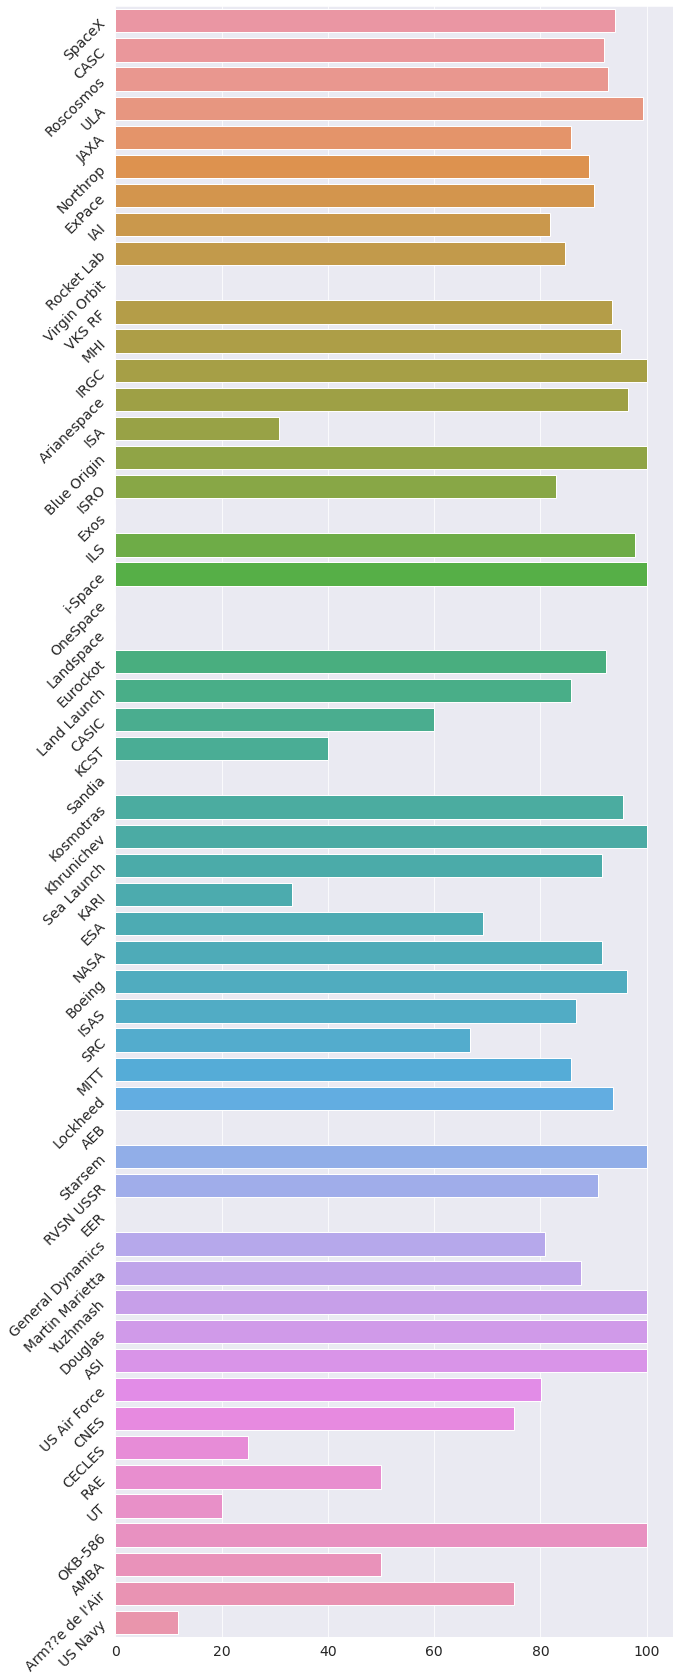

In [38]:
matplotlib.rcParams['figure.figsize'] = (10, 30)
plt.yticks(rotation=45);
sns.barplot(performance_list, df['company'].unique());

From above bar chart, it can be seen that 9 companies have success rate of 100%. But none of them had launched more than 10 missions (except Blue Origin which had successfully completed 12 launches).

So in term of over all success, RVSN USSR have success rate of 90.8% with 1777 successful missions.

**3. Which was most Lucky/Unlucky year in history of space race?**

In [39]:
failed_mission_yearwise = space_df[space_df.mission_status != 'Success'].groupby('year').mission_status.count()
total_mission_yearwise = space_df.groupby('year').mission_status.count()

failed_total_mission_ratio_yearwise = failed_mission_yearwise / total_mission_yearwise 

failed_total_mission_percent_yearwise = failed_total_mission_ratio_yearwise * 100

In [40]:
failed_total_mission_percent_yearwise.sort_values(ascending = False)

year
1958    78.571429
1959    60.000000
1960    51.282051
1961    38.461538
1957    33.333333
          ...    
1977     3.508772
2018     3.418803
1988     3.389831
1978     3.092784
1983     1.515152
Name: mission_status, Length: 64, dtype: float64

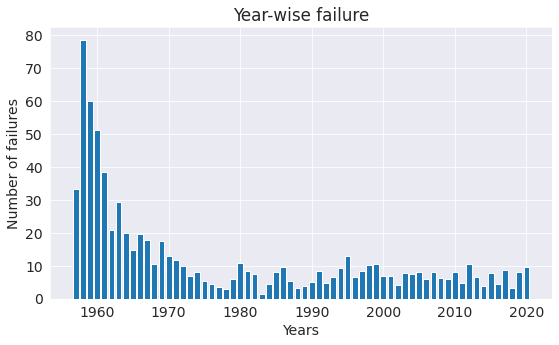

In [53]:
matplotlib.rcParams['figure.figsize'] = (9,5)
#plt.plot(failed_total_mission_percent_yearwise.sort_values(ascending = False).head(10));


plt.bar(  *zip(  *dict(failed_total_mission_percent_yearwise.sort_values(ascending = False)).items()  )  );
plt.xlabel("Years");plt.ylabel("Number of failures"); plt.title("Year-wise failure");

Clearly 1958 was most unlucky year with 78.57% failure and 1983 was most lucky with 1.5% failure rate.

**4. How cost of space missions changed over years?**

In [54]:
to_plot = space_df[space_df.cost_in_million > 0].groupby('year').cost_in_million.mean()
to_plot

year
1964     63.230000
1965     63.230000
1966     59.000000
1967     59.000000
1968     59.000000
1969     59.000000
1981    450.000000
1982    345.200000
1983    366.160000
1984    380.133333
1985    408.080000
1986    310.266667
1987     30.800000
1988    241.450000
1989    380.833333
1990    289.145455
1991    391.428571
1992    319.345833
1993    276.733333
1994    221.509375
1995    325.000000
1996    243.196429
1997    221.738889
1998    152.122222
1999    128.511429
2000    173.118750
2001    290.700000
2002    185.585882
2003     80.511500
2004     92.735882
2005     95.793333
2006    138.605926
2007    125.695172
2008    129.748214
2009    180.287097
2010    148.400000
2011    146.596552
2012    122.292000
2013     90.551515
2014    102.551220
2015     91.548718
2016     79.457344
2017     69.491061
2018     64.749773
2019     59.609726
2020     56.650192
Name: cost_in_million, dtype: float64

Above mean is inaccurate for some years because of lack of data in that year. We can remove those years where less than 5 cost_per_million data not available.

In [55]:
# Remove year if less than 5 cost_in_million data available in that year

tmp = dict(space_df[space_df.cost_in_million > 0].groupby('year').year.count())

tmp_list = []

for i in tmp:
    
    if tmp[i] < 5:
        tmp_list.append(i)

for j in tmp_list:
    to_plot = to_plot.drop(labels=j)

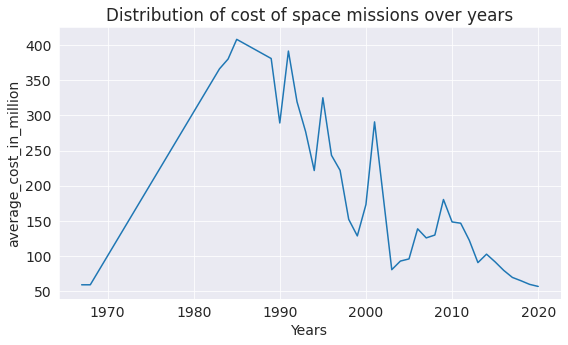

In [56]:
plt.plot(to_plot);
plt.xlabel("Years");plt.ylabel("average_cost_in_million"); plt.title("Distribution of cost of space missions over years");

From above graph we can conclude that cost per mission decresed considerably over time (even with inflation). All credit goes to development and innovation of space scientists, cosmologists to name a few.

**5. Best performing company in past 5 years?**

In [57]:
space_after_2015_df = space_df[space_df.year > 2015]
space_after_2015_series = space_after_2015_df.groupby(['company']).company.count().sort_values(ascending=False)

space_success_after_2015_df = space_after_2015_df[space_after_2015_df.mission_status == "Success"]
space_success_after_2015_series = space_success_after_2015_df.groupby(['company']).company.count().sort_values(ascending=False)

space_success_after_2015_series

company
CASC           114
SpaceX          74
Arianespace     44
Roscosmos       43
ULA             37
VKS RF          26
ISRO            24
MHI             16
Northrop        12
Rocket Lab      11
Blue Origin     10
ExPace           9
ILS              5
JAXA             5
Eurockot         3
IAI              2
IRGC             1
CASIC            1
KCST             1
Land Launch      1
i-Space          1
Name: company, dtype: int64

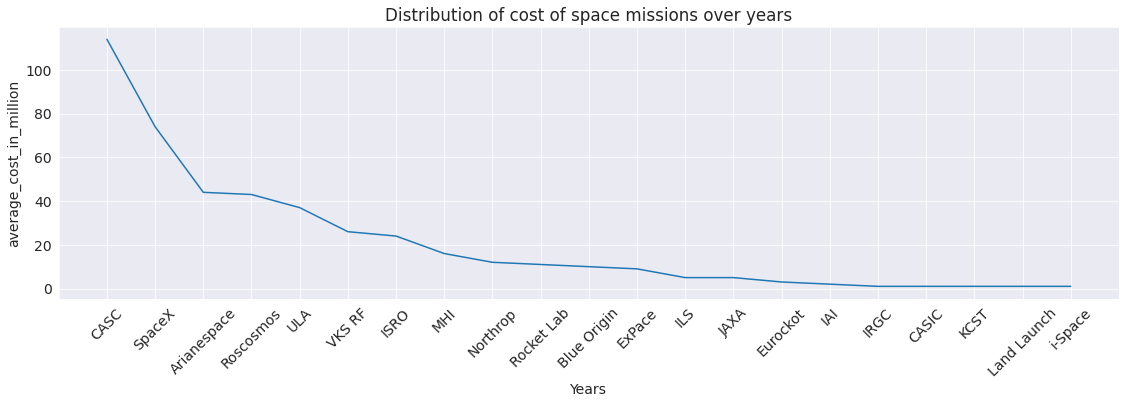

In [58]:
matplotlib.rcParams['figure.figsize'] = (19,5)
plt.plot(space_success_after_2015_series);
plt.xticks(rotation = 45);
plt.xlabel("Years");plt.ylabel("average_cost_in_million"); plt.title("Distribution of cost of space missions over years");

In [59]:
for i in space_df.company.unique():
    try:
        success_in_5_year = space_success_after_2015_series[i] / space_after_2015_series[i] * 100
        print("Percentage success of {} in last 5 years is {}".format(i,success_in_5_year))
    except KeyError:
        continue;

Percentage success of SpaceX in last 5 years is 98.66666666666667
Percentage success of CASC in last 5 years is 94.21487603305785
Percentage success of Roscosmos in last 5 years is 91.48936170212765
Percentage success of ULA in last 5 years is 100.0
Percentage success of JAXA in last 5 years is 83.33333333333334
Percentage success of Northrop in last 5 years is 100.0
Percentage success of ExPace in last 5 years is 90.0
Percentage success of IAI in last 5 years is 100.0
Percentage success of Rocket Lab in last 5 years is 84.61538461538461
Percentage success of VKS RF in last 5 years is 100.0
Percentage success of MHI in last 5 years is 100.0
Percentage success of IRGC in last 5 years is 100.0
Percentage success of Arianespace in last 5 years is 95.65217391304348
Percentage success of Blue Origin in last 5 years is 100.0
Percentage success of ISRO in last 5 years is 96.0
Percentage success of ILS in last 5 years is 100.0
Percentage success of i-Space in last 5 years is 100.0
Percentage s

Cleary, CASC, SpaceX, Arianespace, Roscosmos and ULA are best performing companies in past 5 years.         

In [60]:
import jovian

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rishi/space-race-analysis-2682a" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/rishi/space-race-analysis-2682a


'https://jovian.ml/rishi/space-race-analysis-2682a'

## Inferences and Conclusion

Conclusions from above analysis are:-
- Cold war boosted space race hence too many space missions until 1980.
- ISRO launched its first mission in 1979 which was failure. But because of continious hardwork, success rate improved to 96% at present.
-  Kenya have success of 100% but launched only 9 missions.
- Till date, Russia had launched maximum number of space missions.
- Initially cost of space missions was very high but chances of failure was also high.
- Since beggining of space race, space agencies of Russia, USA and France performed best. But in last decade, companies like spacex , ISRO, ULA, CASC also performed well.
- 81.7% rockets of space race are now just space trash (i.e. retired).

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

This dataset can be used fo further analysis of space race:
1. Which month or weekday performed best.
2. Performance of individual companies.
3. Performance of individual countries.

References:

- Kaggle Dataset: https://www.kaggle.com/agirlcoding/all-space-missions-from-1957
- Official documentation of python3
- Project of other students: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684/329
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html


In [ ]:
import jovian

In [ ]:
jovian.commit()